<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assign-input,-output,-weight,-learning-rate" data-toc-modified-id="Assign-input,-output,-weight,-learning-rate-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assign input, output, weight, learning rate</a></span></li><li><span><a href="#Activation-function:-Sigmoid" data-toc-modified-id="Activation-function:-Sigmoid-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Activation function: Sigmoid</a></span><ul class="toc-item"><li><span><a href="#Derivative-of-Sigmoid-function" data-toc-modified-id="Derivative-of-Sigmoid-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Derivative of Sigmoid function</a></span></li><li><span><a href="#First-round-calculation" data-toc-modified-id="First-round-calculation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>First round calculation</a></span><ul class="toc-item"><li><span><a href="#Feedforward-input" data-toc-modified-id="Feedforward-input-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Feedforward input</a></span></li><li><span><a href="#Feedforward-output" data-toc-modified-id="Feedforward-output-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Feedforward output</a></span></li><li><span><a href="#Error-Calculation" data-toc-modified-id="Error-Calculation-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Error Calculation</a></span></li><li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Backpropagation</a></span></li></ul></li><li><span><a href="#Derivation-of-the-formula-used-in-a-neural-network" data-toc-modified-id="Derivation-of-the-formula-used-in-a-neural-network-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Derivation of the formula used in a neural network</a></span><ul class="toc-item"><li><span><a href="#Calculate-the-1st-part-$\frac{\partial-Error}{\partial-out_o}-=-output-target-=--0.31003$" data-toc-modified-id="Calculate-the-1st-part-$\frac{\partial-Error}{\partial-out_o}-=-output-target-=--0.31003$-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Calculate the 1st part $\frac{\partial Error}{\partial out_o} = output-target = -0.31003$</a></span></li><li><span><a href="#Calculate-the-2nd-part-$\frac{\partial-out_o}{\partial-in_o}-=-out_o-\times-(1---out_o)-=-0.21391$" data-toc-modified-id="Calculate-the-2nd-part-$\frac{\partial-out_o}{\partial-in_o}-=-out_o-\times-(1---out_o)-=-0.21391$-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Calculate the 2nd part $\frac{\partial out_o}{\partial in_o} = out_o \times (1 - out_o) = 0.21391$</a></span></li><li><span><a href="#Calculate-the-3rd-part-$\frac{\partial-in_o}{\partial-w}-=-input-\-values-=-1$" data-toc-modified-id="Calculate-the-3rd-part-$\frac{\partial-in_o}{\partial-w}-=-input-\-values-=-1$-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Calculate the 3rd part $\frac{\partial in_o}{\partial w} = input \ values = 1$</a></span></li><li><span><a href="#Put-3-parts-together" data-toc-modified-id="Put-3-parts-together-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Put 3 parts together</a></span></li><li><span><a href="#New-calculate-new-weights-to-join-the-next-epoch" data-toc-modified-id="New-calculate-new-weights-to-join-the-next-epoch-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>New calculate new weights to join the next epoch</a></span></li></ul></li></ul></li><li><span><a href="#Why-do-we-need-bias?" data-toc-modified-id="Why-do-we-need-bias?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Why do we need bias?</a></span></li></ul></div>

# Assign input, output, weight, learning rate

In [3]:
import numpy as np
import pandas as pd
data = {'Fever':[0,0,1,1],'Shortness_breath':[0,1,0,1], 'Need_exam':[0,1,1,1]}
covid = pd.DataFrame(data)
covid

,Fever,Shortness_breath,Need_exam
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [5]:
# Simplify our example
data = {'input1':[0,0,1,1],'input2':[0,1,0,1], 'target':[0,1,1,1]}
df = pd.DataFrame(data)
df

,input1,input2,target
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


$
\begin{vmatrix}
I_1 & I_2 \\
I_1 & I_2 \\
I_1 & I_2 \\
I_1 & I_2 \\
\end{vmatrix} 
\times
\begin{vmatrix}
W_1  \\
W_2  \\
\end{vmatrix} -> 
\begin{vmatrix}
I_w  \\
I_w  \\
I_w  \\
I_w  \\
\end{vmatrix} ->
Activation
 = 
\begin{vmatrix}
O  \\
O  \\
O  \\
O  \\
\end{vmatrix}
$

# Activation function: Sigmoid

$$f(x) = Sigmoid(x) = \frac{1}{1 + e^{(-x)}}$$
* f(x):sigmoid output value should between 0 and 1

* e:known as Euler's number, is a mathematical constant approximately equal to 2.71828.

* x: input values
* In the binary classification both sigmoid and softmax function are the same where as in the multi-class classification we use Softmax function.

Text(0, 0.5, 'Output')

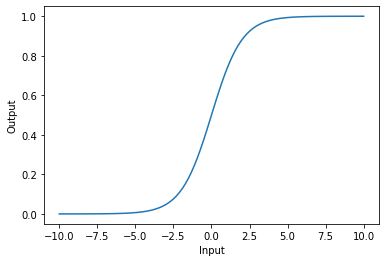

In [6]:
# Define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

import numpy as np
import matplotlib.pyplot as plt

example = np.linspace(-10,10,100) # generate 100 points between -10 and 10
#print('example:',example)
output = sigmoid(example)
plt.plot(example,output)
plt.xlabel("Input")
plt.ylabel("Output")

## Derivative of Sigmoid function

$$
f'(x) = \frac{d}{dx}{Sigmoid(x)} = Sigmoid(x)*(1-Sigmoid(x))
$$

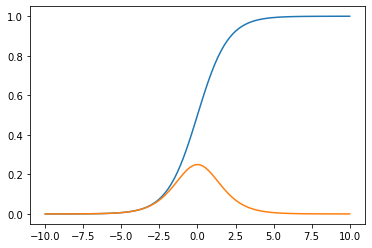

In [7]:
# The derivative measures the steepness of the graph of a function at some particular point on the graph
# The derivative is a slope.
# Define derivative of sigmoid function
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))
der_output = sigmoid_der(example)
plt.plot(example,output)
plt.plot(example,der_output)

## First round calculation

In [27]:
df

,input1,input2,target
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


### Feedforward input

Initialize Weights -> Summation -> Activation -> Error
* Randomly assign weight for x1 x2 and bias: w1 = 0.2, w2 = 0.3, w3 = 0.5
* From dataset, we choose row 1: x1 = 0, x2 = 1, target = 1

Weighted perceptron o1 from the row 1: \
$
in_{o1} = input_1*w_1 + input_2*w_2 + bias \\
= x_1 \times w_1 + x_2 \times w_2 + b \times w_3\\
= 0 \times 0.2 + 1 \times 0.3 + 1 \times 0.5 \\
= 0 + 0.3 + 0.5 \\
= 0.8
$

### Feedforward output

$in_{o1} -> sigmoid \ standardize -> out_{o1} \\
out_{o1} = sigmoid(in_{o1}) = \frac{1}{1 + e^{-0.8}} = 0.68997
$

### Error Calculation
$
\begin{align}
Error = MSE = \frac{1}{n} \sum_ {i=1}^n (\hat Y_i - Y_i)^2  = \frac{1}{2} \sum_ {}(target_1 - output_1)^2 \\
= 0.5 * (1 - 0.68997)^2 = 0.048059
\end{align}
$

You need to calculate for all input pairs, here is an example for only one input

### Backpropagation
Update Weights <- Summation <- Activation <- Error

$$X = X - lr * \frac{d}{dX}{f(X)}$$

$
W_{new1} = W_{old1} - lr * \frac{dError}{dW_1} \\
W_{new2} = W_{old2} - lr * \frac{dError}{dW_2}
$
* X:input
* lr:learning rate
* f(X): output based on X
* assume lr = 0.01

## Derivation of the formula used in a neural network

$$\frac{\partial Error}{\partial w} = \frac{\partial Error}{\partial out_o} \times \frac{\partial out_o}{\partial in_o} \times  \frac{\partial in_o}{\partial w}$$

### Calculate the 1st part $\frac{\partial Error}{\partial out_o} = output-target = -0.31003$

$
\frac{\partial Error}{\partial out_o} = \frac{\partial}{\partial out_o}({\frac{1}{2}*{(target - output)^2})}
$

$
\frac{\partial Error}{\partial out_o} = (\frac{1}{2}*2*{(target - output))}* \frac{\partial}{\partial out_o}{(target - output)}
$ ------> power rule

$
\frac{\partial Error}{\partial out_o} = (target - output) * (-1)
$

$
\frac{\partial Error}{\partial out_o} = output - target
$

$ 
\because out_{o1} = 0.68997, target = 1
$

$\therefore \frac{\partial Error}{\partial out_o} = (0.68997 - 1) = -0.31003$

### Calculate the 2nd part $\frac{\partial out_o}{\partial in_o} = out_o \times (1 - out_o) = 0.21391$

$
\because out_{o1} = sigmoid(in_{o1}) = \frac{1}{1 + e^{-in_{o1}}}
$

$
\frac{\partial out_{o1}}{\partial ino_1} = \frac{\partial}{\partial in_{o1}}{(\frac{1}{1 + e^{-in_{o1}}})}
$ ------> Move denominator up

$
= \frac{\partial}{\partial in_{o1}}{(1 + e^{-in_{o1}})}^{-1}
$  -----> simplify

$
= -1(1 + e^{-in_{o1}})^{-2} \times \frac{\partial}{\partial in_{o1}}(1 + e^{-in_{o1}})
$ ------> chain rule + power rule

$
= -1(1 + e^{-in_{o1}})^{-2} \times (\frac{\partial}{\partial in_{o1}}(1) + \frac{\partial}{\partial in_{o1}}(e^{-in_{o1}}))
$ ------> sum rule

$
= -1(1 + e^{-in_{o1}})^{-2} \times (0 + \frac{\partial}{\partial in_{o1}}(e^{-in_{o1}}))
$ ------> simplify

$
= -1(1 + e^{-in_{o1}})^{-2} \times (e^{-in_{o1}} \times \frac{\partial}{\partial in_{o1}}(-in_{o1}))
$ ------> exponential rule

$
= -1(1 + e^{-in_{o1}})^{-2} \times (e^{-in_{o1}} \times (-1))
$ ------> simplify

$
= (1 + e^{-in_{o1}})^{-2} \times (e^{-in_{o1}})
$ ------> simplify

$
= \frac{e^{-in_{o1}}}{(1 + e^{-in_{o1}})^2}
$ ------> simplify

$
= \frac{1 \times (e^{-in_{o1}})}{(1 + e^{-in_{o1}}) \times(1 + e^{-in_{o1}})}
$ ------> tricks

$
= \frac{1}{1 + e^{-in_{o1}}} \times \frac{e^{-in_{o1}}}{1 + e^{-in_{o1}}}
$ ------> separate

$
= \frac{1}{1 + e^{-in_{o1}}} \times \frac{e^{-in_{o1}} + 1 - 1}{1 + e^{-in_{o1}}}
$ ------> tricks

$
= \frac{1}{1 + e^{-in_{o1}}} \times [\frac{e^{-in_{o1}} + 1}{1 + e^{-in_{o1}}} - \frac{1}{1 + e^{-in_{o1}}}]
$ ------> separate

$
= \frac{1}{1 + e^{-in_{o1}}} \times [1 - \frac{1}{1 + e^{-in_{o1}}}]
$ ------> simplify

$
\because out_{o1} = \frac{1}{1 + e^{-in_{o1}}} = 0.68997
$ 

$
\therefore \frac{\partial out_{o1}}{\partial ino_1} = out_{o1} \times (1 - out_{o1}) = 0.68997 \times (1 - 0.68997) = 0.21391
$

### Calculate the 3rd part $\frac{\partial in_o}{\partial w} = input \ values = 1$

All the other values except w2 will be considered constant here.
$
\frac{\partial in_{o1}}{\partial w} = w_1 \times x_1 + w_2 \times x_2 = x_2 = 1
$ 

### Put 3 parts together

$\frac{\partial Error}{\partial w} = \frac{\partial Error}{\partial out_o} \times \frac{\partial out_o}{\partial in_o} \times  \frac{\partial in_o}{\partial w} = -0.31003 \times 0.21391 \times 1 = -0.06631$

### New calculate new weights to join the next epoch
$
\because w_{new1} = w_{old1} - lr \times \frac{\partial Error}{\partial w_1} \\
= 0.2 - (0.05) \times (-0.06631) \\
= 0.2033155
$

In [67]:
df

,input1,input2,target
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [8]:
#input_features = np.array([[0,0],[0,1],[1,0],[1,1]])
input_features = df[['input1','input2']].to_numpy()
print(input_features.shape)
input_features

(4, 2)


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [9]:
#target_output = np.array([[0,1,1,1]])
target_output = df[['target']].to_numpy()
target_output = target_output.reshape(4,1)
print(target_output.shape)
target_output

(4, 1)


array([[0],
       [1],
       [1],
       [1]])

In [10]:
weights = np.array([[0.1],[0.2]])
print(weights.shape)
weights

(2, 1)


array([[0.1],
       [0.2]])

In [11]:
bias = 0.3
lr = 0.05

$\frac{\partial Error}{\partial w} = \frac{\partial Error}{\partial out_o} \times \frac{\partial out_o}{\partial in_o} \times  \frac{\partial in_o}{\partial w}$

1st part $\frac{\partial Error}{\partial out_o} = output-target$ 

2nd part $\frac{\partial out_o}{\partial in_o} = out_o \times (1 - out_o)$

3rd part $\frac{\partial in_o}{\partial w} = input \ values$

In [12]:
weights = np.array([[0.1],[0.2]])
bias = 0.3
lr = 0.05

for epoch in range(1):
    print('weights:',weights)
    
    inputs = input_features
    print('inputs:',inputs)
    
    in_o = np.dot(inputs, weights) + bias
    print('bias:',bias)
    print('in_o:',in_o)
    
    out_o = sigmoid(in_o)
    print('out_o:',out_o)
    
    error = out_o - target_output
    print('target_output:',target_output)
    print('error:',error)

    dError_dOut = error #1st part
    print('first part:',dError_dOut)
    
    dOut_dIn = sigmoid_der(out_o) #2nd part
    print('second part:',dOut_dIn)
    
    # We need to update bias. Bias weight is not dependent on the input.
    # We have to update it separately.
    # We need deriv values to update bias value.
    deriv = dError_dOut * dOut_dIn
    print('deriv:',deriv)
    
    inputs = input_features.T #3rd part
    print('third part:',inputs)
    deriv_final = np.dot(inputs, deriv) 
    print('All 3 parts:',deriv_final)
    
    weights -= lr * deriv_final # Get new weight
    print('New Weight:',weights)
    
    # Through the "for loop" for updating bias at each input on every iteration
    for i in deriv:
        bias -= lr * i
    print('New Bias:',bias)
    print('------')

weights: [[0.1]
 [0.2]]
inputs: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
bias: 0.3
in_o: [[0.3]
 [0.5]
 [0.4]
 [0.6]]
out_o: [[0.57444252]
 [0.62245933]
 [0.59868766]
 [0.64565631]]
target_output: [[0]
 [1]
 [1]
 [1]]
error: [[ 0.57444252]
 [-0.37754067]
 [-0.40131234]
 [-0.35434369]]
first part: [[ 0.57444252]
 [-0.37754067]
 [-0.40131234]
 [-0.35434369]]
second part: [[0.23045942]
 [0.22726609]
 [0.22887163]
 [0.22565434]]
deriv: [[ 0.13238569]
 [-0.08580219]
 [-0.09184901]
 [-0.07995919]]
third part: [[0 0 1 1]
 [0 1 0 1]]
All 3 parts: [[-0.1718082 ]
 [-0.16576139]]
New Weight: [[0.10859041]
 [0.20828807]]
New Bias: [0.30626124]
------


In [15]:
# Clear Version
weights = np.array([[0.1],[0.2]])
bias = 0.3
lr = 0.05

for epoch in range(10000):
    inputs = input_features
    in_o = np.dot(inputs, weights) + bias
    out_o = sigmoid(in_o)
    error = out_o - target_output
    
    x = error.sum()
    if epoch%1000 == 0:
        print('Epoch:',epoch,'Error Sum:',x)
    
    dError_dOut = error #1st part
    dOut_dIn = sigmoid_der(out_o) #2nd part
    deriv = dError_dOut * dOut_dIn
    inputs = input_features.T #3rd part
    deriv_final = np.dot(inputs, deriv) 
    weights -= lr * deriv_final 
    
    for i in deriv:
        bias -= lr * i

Epoch: 0 Error Sum: -0.558754185648239
Epoch: 1000 Error Sum: 0.037435259617937255
Epoch: 2000 Error Sum: 0.010234151940755193
Epoch: 3000 Error Sum: 0.004028391676866666
Epoch: 4000 Error Sum: 0.0018527234441660656
Epoch: 5000 Error Sum: 0.0008983306007179087
Epoch: 6000 Error Sum: 0.0004194011882355936
Epoch: 7000 Error Sum: 0.0001571435337541019
Epoch: 8000 Error Sum: 4.882376626338947e-06
Epoch: 9000 Error Sum: -8.69963119052991e-05


In [61]:
print('Weights:',weights)
print('Bias:',bias)

Weights: [[8.43423044]
 [8.43430746]]
Bias: [-3.87076502]


In [16]:
# Prediction with the new model for [1,0], groud truth result = 1
single_point = np.array([1,0])
result1 = np.dot(single_point, weights) + bias
result2 = sigmoid(result1)
result2

array([0.9793702])

In [17]:
# Prediction with the new model for [0,0], groud truth result = 0
single_point = np.array([0,0])
result1 = np.dot(single_point, weights) + bias
result2 = sigmoid(result1)
result2

array([0.04112867])

# Why do we need bias?

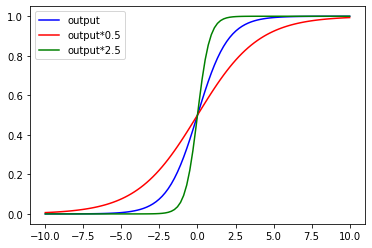

In [18]:
# Change steepness
input = np.linspace(-10,10,100)
output = sigmoid(input)
plt.plot(input,output,c="blue",label='output')
output = sigmoid(input*0.5)
plt.plot(input,output,c="red",label='output*0.5')
output = sigmoid(input*2.5)
plt.plot(input,output,c="green",label='output*2.5')
plt.legend()

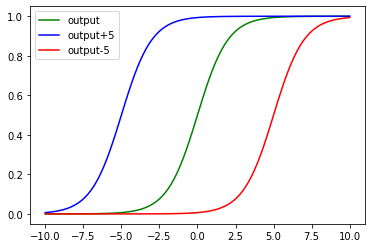

In [186]:
# Change location
input = np.linspace(-10,10,100)
output = sigmoid(input)
plt.plot(input,output,c="green",label='output')
output = sigmoid(input+5)
plt.plot(input,output,c="blue",label = 'output+5')
output = sigmoid(input-5)
plt.plot(input,output,c="red",label = 'output-5')
plt.legend()

In [21]:
# Clear Version
weights = np.array([[0.1],[0.2]])
#bias = 0.3
lr = 0.05

for epoch in range(10000):
    inputs = input_features
    in_o = np.dot(inputs, weights) #+ bias
    out_o = sigmoid(in_o)
    error = out_o - target_output
    
    x = error.sum()
    if epoch%1000 == 0:
        print('Epoch:',epoch,'Error Sum:',x)
    
    dError_dOut = error #1st part
    dOut_dIn = sigmoid_der(out_o) #2nd part
    inputs = input_features.T #3rd part
    deriv_final = np.dot(inputs, dError_dOut * dOut_dIn) 
    
    weights -= lr * deriv_final 
    
    #for i in deriv:
    #    bias -= lr * i

Epoch: 0 Error Sum: -0.850744298396923
Epoch: 1000 Error Sum: 0.3376107888502803
Epoch: 2000 Error Sum: 0.41092044099152836
Epoch: 3000 Error Sum: 0.4383944163580791
Epoch: 4000 Error Sum: 0.4528585619480444
Epoch: 5000 Error Sum: 0.4618012324456926
Epoch: 6000 Error Sum: 0.46788262632847033
Epoch: 7000 Error Sum: 0.47228872085099927
Epoch: 8000 Error Sum: 0.47562896673845945
Epoch: 9000 Error Sum: 0.4782488952248769


In [22]:
print('Weights:',weights)

Weights: [[4.6169307 ]
 [4.61995023]]


In [24]:
# Prediction with the new model for [1,0], groud truth result = 1
single_point = np.array([1,0])
result1 = np.dot(single_point, weights)
result2 = sigmoid(result1)
result2

array([0.99021364])

In [25]:
# Prediction with the new model for [0,0], groud truth result = 0
single_point = np.array([0,0])
result1 = np.dot(single_point, weights)
result2 = sigmoid(result1)
result2

array([0.5])